In [49]:
#load data
import pandas as pd
import numpy as np

emissionsData = pd.read_csv('emissions.csv')
lungCancerDeathRatesData = pd.read_csv('Mortality-Rates-by-State.csv', header=1)
asthmaData = pd.read_csv('AsthmaTotals.csv')


In [25]:
emissionsData.head()

,year,state-name,sector-name,fuel-name,value
0,1970,Alabama,Industrial carbon dioxide emissions,Coal,26.721507
1,1970,Alabama,Industrial carbon dioxide emissions,Petroleum,3.577779
2,1970,Alabama,Industrial carbon dioxide emissions,Natural Gas,8.944097
3,1970,Alabama,Industrial carbon dioxide emissions,All Fuels,39.243383
4,1970,Alabama,Total carbon dioxide emissions from all sectors,All Fuels,102.646851


In [26]:
lungCancerDeathRatesData.head()

,State,2003-Total,2004-Total,2005-Total,2006-Total,2007-Total,2008-Total,2009-Total,2010-Total,2011-Total,2012-Total,2013-Total,2014-Total,2015-Total,2016-Total,2017-Total,2018-Total,2019-Total,2020-Total,2021-Total
0,Alabama,64.9,62.7,63.8,60.2,61.6,58.8,61.6,60.0,57.0,54.1,54.7,52.6,49.1,49.0,46.7,45.8,41.9,40.8,40.0
1,Alaska,55.7,57.4,51.0,46.2,55.2,53.0,55.3,49.4,49.4,50.0,47.0,40.3,41.5,38.4,31.4,31.4,30.5,32.1,33.1
2,Arizona,48.3,46.2,43.3,43.0,39.4,38.6,39.9,39.0,36.8,37.1,35.4,33.2,34.5,30.4,30.6,27.9,25.4,25.3,26.3
3,Arkansas,67.4,68.9,70.4,65.4,63.7,67.8,64.7,63.0,61.3,60.8,60.5,56.2,57.1,53.1,51.0,47.4,45.7,45.9,44.0
4,California,43.8,42.3,41.5,40.3,39.4,38.1,37.8,36.6,34.8,33.2,32.1,30.6,29.9,27.7,26.6,25.0,23.7,22.4,22.6


In [27]:
asthmaData.head()

,State,Total,Year
0,Alabama,353847,2014
1,Alaska,44865,2014
2,Arizona,484115,2014
3,Arkansas,197478,2014
4,California,2279568,2014


In [28]:
#check for NULL values
emissions_nulls = emissionsData.isnull().sum().sum()  
lung_cancer_nulls = lungCancerDeathRatesData.isnull().sum().sum()  
asthma_nulls = asthmaData.isnull().sum().sum() 

# print total count
print(f"Total null values in emissionsData: {emissions_nulls}")
print(f"Total null values in lungCancerDeathRatesData: {lung_cancer_nulls}")
print(f"Total null values in asthmaData: {asthma_nulls}")

Total null values in emissionsData: 0
Total null values in lungCancerDeathRatesData: 0
Total null values in asthmaData: 0


In [29]:
# check data types
# Verify the data types again
print("\nUpdated data types in asthmaData:")
print(asthmaData.dtypes)

# Check data types of each DataFrame
print("Data types in emissionsData:")
print(emissionsData.dtypes)

print("\nData types in lungCancerDeathRatesData:")
print(lungCancerDeathRatesData.dtypes)

print("\nData types in asthmaData:")
print(asthmaData.dtypes)



Updated data types in asthmaData:
State    object
Total     int64
Year      int64
dtype: object
Data types in emissionsData:
year             int64
state-name      object
sector-name     object
fuel-name       object
value          float64
dtype: object

Data types in lungCancerDeathRatesData:
State          object
2003-Total    float64
2004-Total    float64
2005-Total    float64
2006-Total    float64
2007-Total    float64
2008-Total    float64
2009-Total    float64
2010-Total    float64
2011-Total    float64
2012-Total    float64
2013-Total    float64
2014-Total    float64
2015-Total    float64
2016-Total    float64
2017-Total    float64
2018-Total    float64
2019-Total    float64
2020-Total    float64
2021-Total    float64
dtype: object

Data types in asthmaData:
State    object
Total     int64
Year      int64
dtype: object


In [30]:
# filter data to 2014-2020 only
emissionsData = emissionsData[(emissionsData['year'] >= 2014) & (emissionsData['year'] <= 2020)]

years_of_interest = ['State', '2014-Total', '2015-Total', '2016-Total', '2017-Total', '2018-Total', '2019-Total', '2020-Total']
lungCancerDeathRatesData = lungCancerDeathRatesData[years_of_interest]

# asthma already 2014-2020


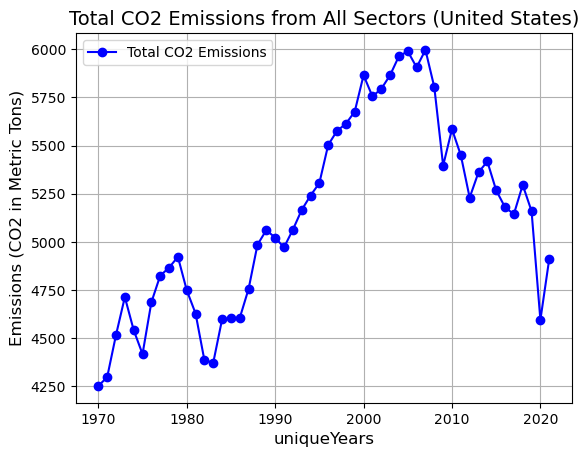

In [75]:
import matplotlib.pyplot as plt


# Get all fuel values 
all_fuels_data = emissionsData[emissionsData['fuel-name'] == 'All Fuels']
all_produced_emissions = all_fuels_data['value']
all_years = all_fuels_data['year']


# Get years
uniqueYears = np.arange(1970,2022)


# Get total co2 from all sectors and their years
filtered_values = emissionsData[
    (emissionsData['state-name'] == 'United States') &
    (emissionsData['sector-name'] == 'Total carbon dioxide emissions from all sectors') &
    (emissionsData['fuel-name'] == 'All Fuels')] ['value']

plt.title('Total CO2 Emissions from All Sectors (United States)', fontsize=14)
plt.xlabel('uniqueYears', fontsize=12)
plt.ylabel('Emissions (CO2 in Metric Tons)', fontsize=12)
plt.plot(uniqueYears, filtered_values, label='Total CO2 Emissions', color='b', marker='o')  # Line plot with markers

    
# Adding a grid for better readability
plt.grid(True)
    
# Show legend
plt.legend()
plt.show()



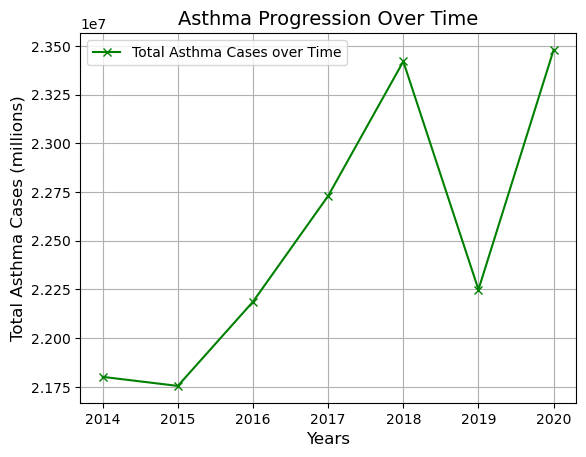

In [85]:
# Plot total asthma values by year

chunk_size = 51

# Initialize an empty list to store the sum of each chunk
summed_values = []

asthmaTotal = asthmaData['Total']

# Iterate through the column in steps of 51
for i in range(0, len(asthmaTotal), chunk_size):
    chunk = asthmaTotal.iloc[i:i + chunk_size]  # Get the chunk of 51 rows
    chunk_sum = chunk.sum()  # Sum the values in the chunk
    summed_values.append(chunk_sum)  # Append the result to the list

    
asthmaYears = np.arange(2014, 2021)


plt.title('Asthma Progression Over Time', fontsize=14)
plt.xlabel('Years', fontsize=12)
plt.ylabel('Total Asthma Cases (millions)', fontsize=12)
plt.plot(asthmaYears, summed_values, label='Total Asthma Cases over Time', color='g', marker='x')  # Line plot with markers

    
# Adding a grid for better readability
plt.grid(True)
    
# Show legend
plt.legend()
plt.show()


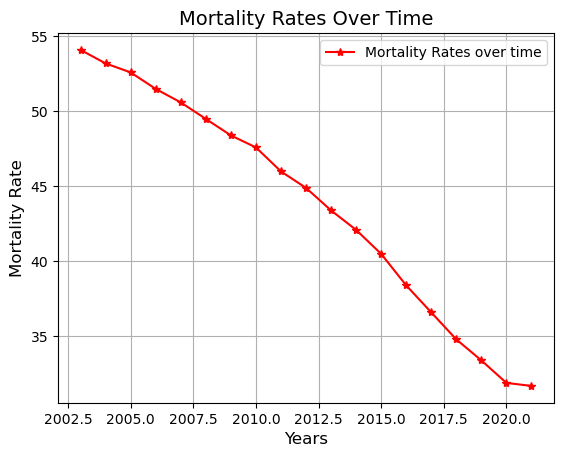

In [90]:
mortalityYears = np.arange(2003, 2022)
mortalityYears = mortalityYears.astype(int)

# Access the last row (excluding the first column 'state')
last_row_values = lungCancerDeathRatesData.iloc[-1, 1:].values  # Select all columns except the first one

# Convert to list (if you want the result as a list)
last_row_values_list = last_row_values.tolist()


plt.title('Mortality Rates Over Time', fontsize=14)
plt.xlabel('Years', fontsize=12)
plt.ylabel('Mortality Rate', fontsize=12)
plt.plot(mortalityYears, last_row_values_list, label='Mortality Rates over time', color='r', marker='*')  # Line plot with markers

    
# Adding a grid for better readability
plt.grid(True)
    
# Show legend
plt.legend()
plt.show()
